In [ ]:
import pandas as pd

df = pd.read_csv('/content/regression_data.csv')
display(df.head())

,x,y
0,-5.000000,183.667854
1,-4.848485,153.129215
2,-4.696970,159.063805
3,-4.545455,168.146438
4,-4.393939,112.293303


# Task
Analyze the data in "/content/regression_data.csv" to find the optimal polynomial fit by splitting the data into 80% training and 20% testing sets, fitting polynomial regression models of degrees 1 through 6, calculating the Mean Squared Error (MSE) for each degree on the test set, and identifying the degree with the minimum MSE.

## Split data

### Subtask:
Divide the dataset into 80% for training and 20% for testing.


**Reasoning**:
Split the data into training and testing sets using 80% for training and 20% for testing.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,x
55,3.333333
88,8.333333
26,-1.060606
42,1.363636
69,5.454545


,x
83,7.575758
53,3.030303
70,5.606061
45,1.818182
44,1.666667


,y
55,53.714102
88,-39.524869
26,-15.810383
42,20.790321
69,0.080940


,y
83,-28.432015
53,45.763848
70,23.357279
45,8.444370
44,-11.392062


## Polynomial regression

### Subtask:
For polynomial degrees from 1 to 6, fit a polynomial regression model to the training data.


**Reasoning**:
Import the necessary modules for polynomial regression and initialize a dictionary to store the models.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fitted_models = {}

**Reasoning**:
Iterate through polynomial degrees from 1 to 6, fit a polynomial regression model for each degree, and store the fitted model in the `fitted_models` dictionary.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

fitted_models = {}
mse_scores = {}
train_mse_scores = {}
r2_scores = {}
train_r2_scores = {}

for degree in range(1, 7):
    poly_features = PolynomialFeatures(degree=degree)

    # Fit and transform training data
    X_train_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    fitted_models[degree] = model

    # Calculate and store training metrics
    y_train_pred = model.predict(X_train_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse_scores[degree] = train_mse
    train_r2_scores[degree] = train_r2

    # Transform and predict on test data
    X_test_poly = poly_features.transform(X_test)
    y_test_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    mse_scores[degree] = mse
    r2_scores[degree] = r2

display(mse_scores)
display(train_mse_scores)
display(r2_scores)
display(train_r2_scores)

{1: 1455.1967335463448,
 2: 1319.7145966029725,
 3: 550.4506045519895,
 4: 396.80142826502845,
 5: 405.7037773726187,
 6: 407.70021751864687}

{1: 1336.1510333970832,
 2: 1314.6523793971444,
 3: 739.2976828042731,
 4: 499.37831662677297,
 5: 498.2401306376023,
 6: 498.1288476705246}

{1: 0.411857051805374,
 2: 0.4666145025422199,
 3: 0.7775258602953627,
 4: 0.839625834440344,
 5: 0.836027795955722,
 6: 0.8352209001138673}

{1: 0.39947508907634344,
 2: 0.40913752764473466,
 3: 0.6677271775307143,
 4: 0.7755574694673188,
 5: 0.7760690201997412,
 6: 0.7761190356487596}

In [ ]:
error_table = pd.DataFrame({
    'Training MSE': train_mse_scores,
    'Testing MSE': mse_scores,
    'Training R2': train_r2_scores,
    'Testing R2': r2_scores
})

display(error_table)

,Training MSE,Testing MSE,Training R2,Testing R2
1,1336.151033,1455.196734,0.399475,0.411857
2,1314.652379,1319.714597,0.409138,0.466615
3,739.297683,550.450605,0.667727,0.777526
4,499.378317,396.801428,0.775557,0.839626
5,498.240131,405.703777,0.776069,0.836028
6,498.128848,407.700218,0.776119,0.835221


from matplotlib import pyplot as plt
error_table['Training MSE'].plot(kind='hist', bins=20, title='Training MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table['Testing MSE'].plot(kind='hist', bins=20, title='Testing MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table['Training R2'].plot(kind='hist', bins=20, title='Training R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table['Testing R2'].plot(kind='hist', bins=20, title='Testing R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table.plot(kind='scatter', x='Training MSE', y='Testing MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table.plot(kind='scatter', x='Testing MSE', y='Training R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
error_table.plot(kind='scatter', x='Training R2', y='Testing R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training R2']
  ys = series['Training MSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = error_table.sort_values('Training R2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training R2')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training R2']
  ys = series['Testing MSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = error_table.sort_values('Training R2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Training R2']
  ys = series['Testing R2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = error_table.sort_values('Training R2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training R2')
_ = plt.ylabel('Testing R2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Training R2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Training R2'}, axis=1)
              .sort_values('Training R2', ascending=True))
  xs = counted['Training R2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = error_table.sort_values('Training R2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training R2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
error_table['Training MSE'].plot(kind='line', figsize=(8, 4), title='Training MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
error_table['Testing MSE'].plot(kind='line', figsize=(8, 4), title='Testing MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
error_table['Training R2'].plot(kind='line', figsize=(8, 4), title='Training R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
error_table['Testing R2'].plot(kind='line', figsize=(8, 4), title='Testing R2')
plt.gca().spines[['top', 'right']].set_visible(False)

### Visualize Other Polynomial Fits

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


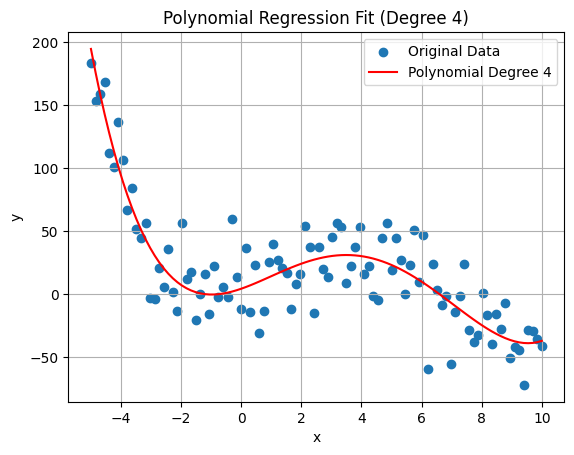

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the fitted model for degree 4
model_degree_4 = fitted_models[4]

# Generate x values for plotting the curve
x_values = np.linspace(X['x'].min(), X['x'].max(), 100).reshape(-1, 1)

# Transform x values using the polynomial features fitted on the training data
poly_features_degree_4 = PolynomialFeatures(degree=4)
# We need to refit poly_features on the entire X data to ensure the transformation is consistent
poly_features_degree_4.fit(X)
x_values_poly = poly_features_degree_4.transform(x_values)

# Predict the corresponding y values
y_values_pred = model_degree_4.predict(x_values_poly)

# Plot the original data
plt.scatter(X, y, label='Original Data')

# Plot the fitted polynomial curve
plt.plot(x_values, y_values_pred, color='red', label=f'Polynomial Degree 4')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (Degree 4)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


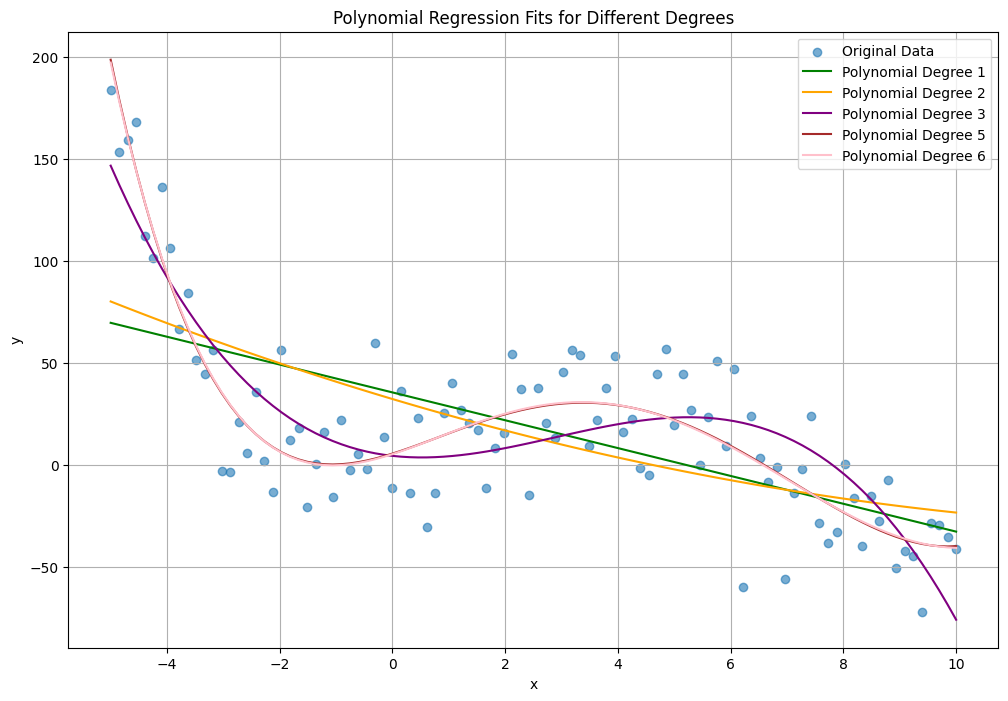

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values for plotting the curves
x_values = np.linspace(X['x'].min(), X['x'].max(), 100).reshape(-1, 1)

# Plot the original data
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Original Data', alpha=0.6)

colors = ['green', 'orange', 'purple', 'brown', 'pink']
degrees_to_plot = [1, 2, 3, 5, 6] # Degrees other than 4

for i, degree in enumerate(degrees_to_plot):
    model = fitted_models[degree]
    poly_features = PolynomialFeatures(degree=degree)
    poly_features.fit(X) # Refit on the entire X data
    x_values_poly = poly_features.transform(x_values)
    y_values_pred = model.predict(x_values_poly)
    plt.plot(x_values, y_values_pred, color=colors[i % len(colors)], label=f'Polynomial Degree {degree}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fits for Different Degrees')
plt.legend()
plt.grid(True)
plt.show()

### MSE vs. Polynomial Degree

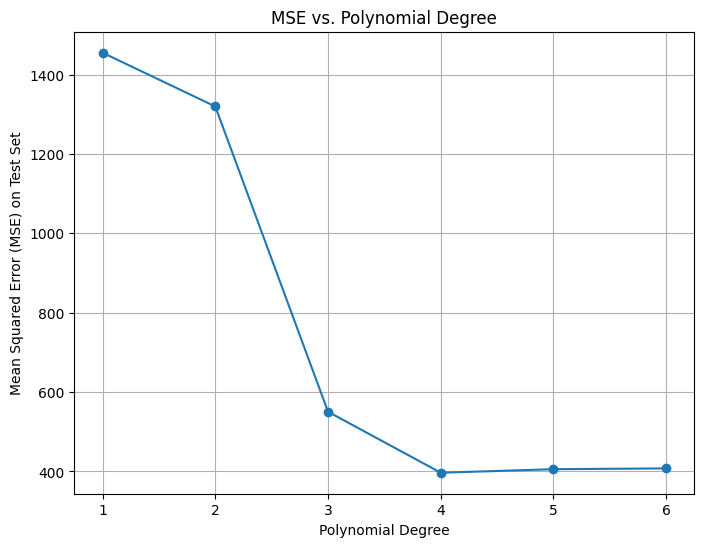

In [ ]:
import matplotlib.pyplot as plt

degrees = list(mse_scores.keys())
mse_values = list(mse_scores.values())

plt.figure(figsize=(8, 6))
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE) on Test Set')
plt.title('MSE vs. Polynomial Degree')
plt.xticks(degrees)
plt.grid(True)
plt.show()

Given the MSE/R2- we should choose polynomial degree (4) to fit this data. While the training error decreases further with degree(5) and (6), but test error starts increasing which indicates a complex model overfitting the data. Also , Looking at R2, we don't see any significant improvement in R^2 with higher degree and it gives us no further benefit by choosing a more complex function.